In [1]:
from georeader.rasterio_reader import RasterioReader
from georeader import read

# S2 image from WorldFloodsv2 dataset
s2url = "https://huggingface.co/datasets/isp-uv-es/WorldFloodsv2/resolve/main/test/S2/EMSR264_18MIANDRIVAZODETAIL_DEL_v2.tif"
rst = RasterioReader(s2url)

# lazy loading bands
rst_rgb = rst.isel({"band": [3, 2, 1]}) # 1-based list as in rasterio

cords_read = (45.43, -19.53) # long, lat
crs_cords = "EPSG:4326"

# See also read.read_from_bounds, read.read_from_polygon for different ways of croping an image
data = read.read_from_center_coords(rst_rgb,
                                    cords_read, shape=(504, 1040),
                                    crs_center_coords=crs_cords)

data_memory = data.load() # this loads the data to memory

data_memory # GeoTensor object

 
         Transform: | 10.00, 0.00, 539910.00|
| 0.00,-10.00, 7842990.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 504, 1040)
         Resolution: (10.0, 10.0)
         Bounds: (539910.0, 7837950.0, 550310.0, 7842990.0)
         CRS: EPSG:32738
         fill_value_default: 0
        

In [2]:
data_memory

 
         Transform: | 10.00, 0.00, 539910.00|
| 0.00,-10.00, 7842990.00|
| 0.00, 0.00, 1.00|
         Shape: (3, 504, 1040)
         Resolution: (10.0, 10.0)
         Bounds: (539910.0, 7837950.0, 550310.0, 7842990.0)
         CRS: EPSG:32738
         fill_value_default: 0
        

<Axes: >

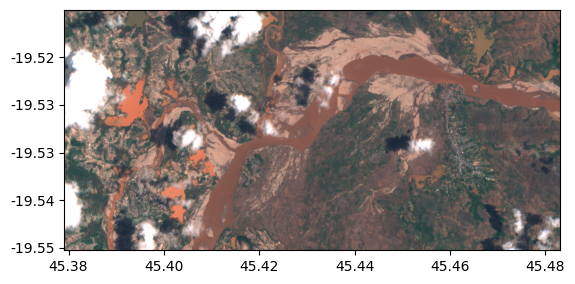

In [3]:
from georeader import plot

plot.show((data_memory / 3_500).clip(0, 1))

In [4]:
from georeader.save import save_cog

# Supports writing in bucket location (e.g. gs://bucket-name/s2_crop.tif)
save_cog(data_memory, "s2_crop.tif", descriptions=["B4","B3", "B2"])